In [30]:
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr
import pickle
from mlconfound.stats import partial_confound_test
from mlconfound.plot import plot_graph

os.environ["PATH"] += os.pathsep + 'C:/Users/lenov/Documents/Graphviz/bin/'

# Rerun the confounder analysis
- Confounder analysis on discovery sample dataset
- Confounder analysis on validation dataset 1
- Confounder analysis on validation dataset 1
- Confounder analysis on the pooled validation  dataset(V1+V2) - as the measured variables are different it is hard to concatenate the two samples

## Discovery sample
#### Summary:
- the contingency to the CSpain after acquisition influenced the model
- the contingency of CSpain after extinction influenced the model

In [32]:
pathtodiscoversmpl="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/discovery_smpl/"
discovery_behav = pd.read_pickle("C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/discovery_smpl/discovery_smpl_behav.pkl")
discovery_behav.columns


Index(['meanFD', 'medianFD', 'maxFD', 'perc_scrubbed', 'age', 'fear_of_pain',
       'fear_of_tone', 'diff_fear', 'hpt', 'tt', 'y_valpainlearn_acq',
       'y_valtonelearn_acq', 'y_valpainlearn_ext', 'y_valtonelearn_ext',
       'y_paincont_acq', 'y_tonecont_acq', 'y_safetycont_acq',
       'y_paincont_ext', 'y_tonecont_ext', 'y_safetycont_ext',
       'hab_UCS_pain_vas', 'hab_UCS_tone_vas', 'PASS_D1', 'PASS_D2', 'PASS_D3',
       'PASS_D4', 'PCS', 'ADS', 'rcpl_score'],
      dtype='object')

In [11]:
datatbl = discovery_behav
predval= 'rcpl_score'
obsvar = 'y_valpainlearn_acq'

pval = 0.05
for i in datatbl.columns[:-1]:
    print(i)
    confoundervar = datatbl[i].to_numpy()
    ret=partial_confound_test(datatbl[obsvar].to_numpy(),
                          datatbl[predval].to_numpy(),
                          confoundervar, return_null_dist=True,
                  random_state=42)
    if ret.p <= pval:
        print('-'*65)
        print('This variable influences the model:',i)
        print('-'*65)
        plot_graph(ret)

meanFD


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1004.81it/s]


medianFD


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1004.20it/s]


maxFD


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 922.58it/s]


perc_scrubbed


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 856.07it/s]


age


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 972.77it/s]


anxiety_pain


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 945.85it/s]


anxiety_tone


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 961.56it/s] 


diff_anxiety


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 959.46it/s]


hpt


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 988.10it/s]


tt


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1007.93it/s]


y_valpainlearn_acq


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1008.97it/s]


y_valtonelearn_acq


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1010.60it/s]


y_valpainlearn_ext


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1016.31it/s]


y_valtonelearn_ext


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1038.17it/s]


y_paincont_acq


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1041.82it/s]


-----------------------------------------------------------------
This variable influences the model: y_paincont_acq
-----------------------------------------------------------------
y_tonecont_acq


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1008.99it/s]


y_safetycont_acq


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1042.06it/s]


y_paincont_ext


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1004.27it/s]


-----------------------------------------------------------------
This variable influences the model: y_paincont_ext
-----------------------------------------------------------------
y_tonecont_ext


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1001.25it/s]


y_safetycont_ext


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 985.33it/s]


hab_UCS_pain_vas


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1020.97it/s]


hab_UCS_tone_vas


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 933.78it/s] 


PASS_D1


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1003.66it/s]


PASS_D2


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 928.16it/s]


PASS_D3


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 997.62it/s]


PASS_D4


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1037.35it/s]


PCS


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 869.96it/s] 


ADS


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 966.61it/s]


Correlation between  y_paincont_acq and rcpl_score : (0.5653246385818235, 0.0032310018537304148)


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1089.34it/s]


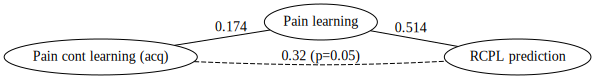

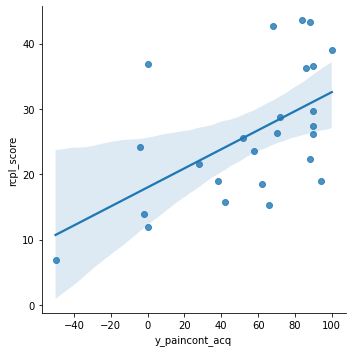

In [16]:
# contingency learning after acquisition
confoundervar='y_paincont_acq'
print('Correlation between ',confoundervar,'and',predval,':',pearsonr(datatbl[confoundervar],datatbl[predval]))
sns.lmplot(x=confoundervar,y=predval,data=datatbl)
ret=partial_confound_test(datatbl[obsvar].to_numpy(),
                          datatbl[predval].to_numpy(),
                          datatbl[confoundervar].to_numpy(), return_null_dist=True,
                  random_state=42)

plot_graph(ret,
           y_name='Pain learning',
           yhat_name='RCPL prediction',
           c_name='Pain cont learning (acq)')


Correlation between  y_paincont_ext and rcpl_score : (0.5030016750248455, 0.010379910656468655)


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 970.46it/s]


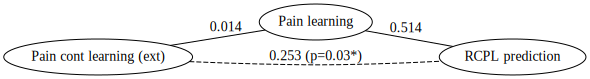

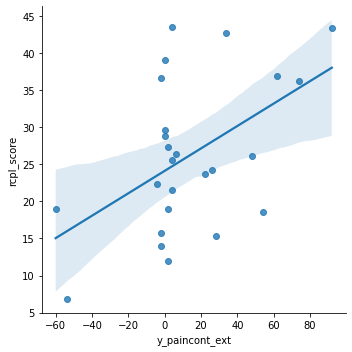

In [17]:
# contingency learning after extinction
confoundervar='y_paincont_ext'
sns.lmplot(x=confoundervar,y=predval,data=datatbl)
print('Correlation between ',confoundervar,'and',predval,':',pearsonr(datatbl[confoundervar],datatbl[predval]))
ret=partial_confound_test(datatbl[obsvar].to_numpy(),
                          datatbl[predval].to_numpy(),
                          datatbl[confoundervar].to_numpy(), return_null_dist=True,
                  random_state=42)

plot_graph(ret,
           y_name='Pain learning',
           yhat_name='RCPL prediction',
           c_name='Pain cont learning (ext)')



# Validation sample 1
- the contingency value of the CSminus after acquisition influenced the model

In [55]:
pathtovalidationsmpl_1="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/validation_smpl1/"
# load behavior data which was preprocessed with R
vs1_behav = pd.read_csv(pathtovalidationsmpl_1+'validation_smpl1_behav_excl.csv', #allbehavdata.csv',
                         index_col=['sub'],)
vs1_behav.columns


Index(['fear_of_pain', 'fear_of_tone', 'hab_UCS_pain_vas', 'hab_UCS_tone_vas',
       'y_safetycont_acq', 'y_safetycont_ext', 'y_paincont_acq',
       'y_paincont_ext', 'y_tonecont_acq', 'y_tonecont_ext', 'PASS_D1',
       'PASS_D2', 'PASS_D3', 'PASS_D4', 'PCS', 'ADS', 'y_valpainlearn_acq',
       'y_valtonelearn_acq', 'y_valpainlearn_lastacq_ext',
       'y_valtonelearn_lastacq_ext', 'meanFD', 'medianFD', 'maxFD',
       'perc_scrubbed', 'prediction_scr'],
      dtype='object')

In [54]:
datatbl = vs1_behav
predval= 'prediction_scr'
obsvar = 'y_valpainlearn_acq'

pval = 0.05
for i in datatbl.columns[:-1]:
    print(i)
    if datatbl[[i]].isna().any()[0]:
        print('The variable contains NA values')
        datatbl_tmp=datatbl[[obsvar,predval,i]].dropna()
    else:
        datatbl_tmp=datatbl
    confoundervar = datatbl_tmp[i].to_numpy()
    ret=partial_confound_test(datatbl_tmp[obsvar].to_numpy(),
                          datatbl_tmp[predval].to_numpy(),
                          confoundervar, return_null_dist=True,
                  random_state=42)
    if ret.p <= pval:
        print('-'*65)
        print('This variable influences the model:',i)
        print('-'*65)
        plot_graph(ret)

fear_of_pain


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1095.75it/s]


fear_of_tone


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1018.35it/s]


hab_UCS_pain_vas


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1057.67it/s]


hab_UCS_tone_vas


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1030.72it/s]


y_safetycont_acq
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 993.23it/s]


-----------------------------------------------------------------
This variable influences the model: y_safetycont_acq
-----------------------------------------------------------------
y_safetycont_ext
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 972.97it/s]


y_paincont_acq
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 954.21it/s]


y_paincont_ext
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 901.33it/s]


y_tonecont_acq
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1012.64it/s]


y_tonecont_ext
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1028.82it/s]


PASS_D1
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1154.00it/s]


PASS_D2
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1145.40it/s]


PASS_D3
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1128.75it/s]


PASS_D4
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1085.62it/s]


PCS
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1109.46it/s]


ADS
The variable contains NA values


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1118.63it/s]


y_valpainlearn_acq


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1013.19it/s]


y_valtonelearn_acq


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1039.50it/s]


y_valpainlearn_lastacq_ext


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1003.54it/s]


y_valtonelearn_lastacq_ext


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1045.13it/s]


meanFD


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1019.34it/s]


medianFD


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1039.09it/s]


maxFD


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1018.52it/s]


perc_scrubbed


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 952.36it/s]


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 939.37it/s] 


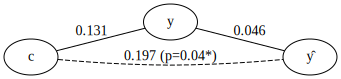

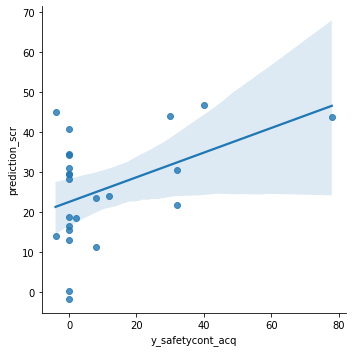

In [57]:
muki=datatbl[[obsvar,predval,'y_safetycont_acq']].dropna()
sns.lmplot(x='y_safetycont_acq',y='prediction_scr',data=datatbl)
ret=partial_confound_test(muki[obsvar].to_numpy(),
                          muki[predval],
                          muki['y_safetycont_acq'].to_numpy(), return_null_dist=True,
                  random_state=42)
plot_graph(ret)

# Validation sample 2
- none of the contingencies or the motion parameters bias the model

In [62]:
pathtovalidationsmpl_2="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/validation_smpl2/"
# load behavior data which was preprocessed with R
vs2_behav = pd.read_csv(pathtovalidationsmpl_2+'validation_smpl2_behav_excl_confounder.csv', #allbehavdata.csv',
                         index_col=['VPN'],)
vs2_behav.columns

Index(['Treatment', 'CS_Vis_Vis_A', 'CS_Vis_Aud_A', 'CS_Aud_Vis_A',
       'CS_Aud_Aud_A', 'CS_Minus_Vis_A', 'CS_Minus_Aud_A', 'CS_Vis_Vis_E',
       'CS_Vis_Aud_E', 'CS_Aud_Vis_E', 'CS_Aud_Aud_E', 'CS_Minus_Vis_E',
       'CS_Minus_Aud_E', 'CS_Vis_Vis_R', 'CS_Vis_Aud_R', 'CS_Aud_Vis_R',
       'CS_Aud_Aud_R', 'CS_Minus_Vis_R', 'CS_Minus_Aud_R',
       'VAS_INTENSITY_AUDIO_A1', 'VAS_INTENSITY_BARO_A1',
       'VAS_UNPLEASANTNESS_AUDIO_A1', 'VAS_UNPLEASANTNESS_BARO_A1',
       'VAS_INTENSITY_AUDIO_A2', 'VAS_INTENSITY_BARO_A2',
       'VAS_UNPLEASANTNESS_AUDIO_A2', 'VAS_UNPLEASANTNESS_BARO_A2',
       'VAS_INTENSITY_AUDIO_R1', 'VAS_INTENSITY_BARO_R1',
       'VAS_UNPLEASANTNESS_AUDIO_R1', 'VAS_UNPLEASANTNESS_BARO_R1', 'meanFD',
       'medianFD', 'maxFD', 'perc_scrubbed', 'prediction_scr',
       'y_valpainlearn_acq', 'y_valtonelearn_acq', 'y_valpainlearn_ext',
       'y_valtonelearn_ext'],
      dtype='object')

In [64]:
datatbl = vs2_behav
predval= 'prediction_scr'
obsvar = 'y_valpainlearn_acq'

pval = 0.05
for i in datatbl.columns[1:]:
    print(i)
    if datatbl[[i]].isna().any()[0]:
        print('The variable contains NA values')
        datatbl_tmp=datatbl[[obsvar,predval,i]].dropna()
    else:
        datatbl_tmp=datatbl
    confoundervar = datatbl_tmp[i].to_numpy()
    ret=partial_confound_test(datatbl_tmp[obsvar].to_numpy(),
                          datatbl_tmp[predval].to_numpy(),
                          confoundervar, return_null_dist=True,
                  random_state=42)
    if ret.p <= pval:
        print('-'*65)
        print('This variable influences the model:',i)
        print('-'*65)
        plot_graph(ret)

CS_Vis_Vis_A


Permuting: 100%|██████████| 1000/1000 [00:04<00:00, 215.67it/s]


CS_Vis_Aud_A


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1011.65it/s]


CS_Aud_Vis_A


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1093.55it/s]


CS_Aud_Aud_A


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1097.32it/s]


CS_Minus_Vis_A


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1074.65it/s]


CS_Minus_Aud_A


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 989.68it/s]


CS_Vis_Vis_E


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1098.39it/s]


CS_Vis_Aud_E


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 954.27it/s]


CS_Aud_Vis_E


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 866.81it/s]


CS_Aud_Aud_E


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 991.40it/s]


CS_Minus_Vis_E


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1099.51it/s]


CS_Minus_Aud_E


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1016.35it/s]


CS_Vis_Vis_R


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1127.21it/s]


CS_Vis_Aud_R


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1110.46it/s]


CS_Aud_Vis_R


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1041.71it/s]


CS_Aud_Aud_R


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1054.54it/s]


CS_Minus_Vis_R


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1035.47it/s]


CS_Minus_Aud_R


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1079.88it/s]


VAS_INTENSITY_AUDIO_A1


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1055.86it/s]


VAS_INTENSITY_BARO_A1


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1123.25it/s]


VAS_UNPLEASANTNESS_AUDIO_A1


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1130.58it/s]


VAS_UNPLEASANTNESS_BARO_A1


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1123.82it/s]


VAS_INTENSITY_AUDIO_A2


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1108.16it/s]


VAS_INTENSITY_BARO_A2


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1118.38it/s]


VAS_UNPLEASANTNESS_AUDIO_A2


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1027.14it/s]


VAS_UNPLEASANTNESS_BARO_A2


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1063.63it/s]


VAS_INTENSITY_AUDIO_R1


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1132.21it/s]


VAS_INTENSITY_BARO_R1


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 978.41it/s]


VAS_UNPLEASANTNESS_AUDIO_R1


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1135.22it/s]


VAS_UNPLEASANTNESS_BARO_R1


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1128.97it/s]


meanFD


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1140.41it/s]


medianFD


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1126.31it/s]


maxFD


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1129.58it/s]


perc_scrubbed


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1129.41it/s]


prediction_scr


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1120.97it/s]


-----------------------------------------------------------------
This variable influences the model: prediction_scr
-----------------------------------------------------------------
y_valpainlearn_acq


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1124.52it/s]


y_valtonelearn_acq


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1121.69it/s]


y_valpainlearn_ext


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1130.03it/s]


y_valtonelearn_ext


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1134.49it/s]
